In [1]:
import sys
sys.path.append('..')

In [3]:
from phycor.layout import Parser

In [4]:
fast_parser = Parser('fast')

/home/rsebastian/.anaconda3/envs/phycor/lib/python3.8/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [5]:
eff_parser = Parser('efficient')

In [6]:
from phycor.loader import Loader

In [7]:
loader = Loader('../data/')

In [9]:
import itertools as it

In [10]:
images = list(it.islice(loader.page_images(), 10))

In [14]:
_, _, img = images[2]

In [15]:
from PIL import Image

In [17]:
source_image = Image.fromarray(img)

In [19]:
fast_layout = fast_parser.model.detect(img)

In [20]:
eff_layout = eff_parser.model.detect(img)

/home/rsebastian/.anaconda3/envs/phycor/lib/python3.8/site-packages/effdet/bench.py:55: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  indices_all = cls_topk_indices_all // num_classes


In [22]:
[b.type for b in eff_layout]

['Text',
 'Text',
 'Text',
 'Figure',
 'Text',
 'Title',
 'Text',
 'Figure',
 'Text',
 'Figure',
 'Figure',
 'Title',
 'Title',
 'Text',
 'Text',
 'Title',
 'Text',
 'Text',
 'Text',
 'Title',
 'Figure']

In [28]:
source_image.crop(fast_layout[3].block.coordinates)

In [21]:
[b.type for b in fast_layout]

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 4,
 4,
 1,
 0,
 0,
 0,
 4,
 0,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 4,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1]

In [2]:
from phycor.main import run

In [3]:
page_layouts = list(run('../data', 20))

2022-03-18 14:19:41 INFO     URL https://www.dropbox.com/s/f3b12qc4hc0yh4m/config.yml?dl=1 cached in /home/rsebastian/.torch/iopath_cache/s/f3b12qc4hc0yh4m/config.yml?dl=1
2022-03-18 14:19:41 INFO     URL https://www.dropbox.com/s/dgy9c10wykk4lq4/model_final.pth?dl=1 cached in /home/rsebastian/.torch/iopath_cache/s/dgy9c10wykk4lq4/model_final.pth?dl=1
/home/rsebastian/.anaconda3/envs/phycor/lib/python3.8/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0
2022-03-18 14:19:41 INFO     [Checkpointer] Loading from /home/rsebastian/.torch/iopath_cache/s/dgy9c10wykk4lq4/model_final.pth?dl=1 ...
2022-03-18 14:19:41 WARNING  The checkpoint state_dict contains keys that are not used 

In [5]:
import pickle
with open('../data/cache/page_layouts_phy_1_first_20.cache', 'wb') as f:
    pickle.dump(page_layouts, f)

In [6]:
import pickle
with open('../data/cache/page_layouts_phy_1_first_20.cache', 'rb') as f:
    page_layouts = pickle.load(f)

In [8]:
from phycor.inspect import layout_parser_show
pil_image = layout_parser_show(*page_layouts[1])

File: ../data/books/physik_1.pdf Page: 1


In [9]:
from PIL import Image

In [12]:
filename, page_index, image, layout = page_layouts[1]
source_image = Image.fromarray(image)

In [16]:
source_image.size

(595, 732)

In [32]:
layout[0].block.coordinates

(44.273006439208984, 54.807865142822266, 551.2921142578125, 695.6902465820312)

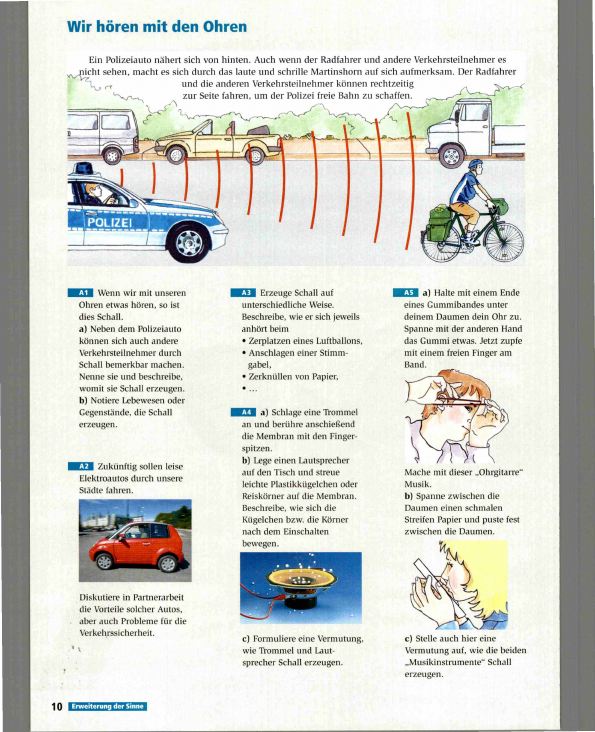

In [34]:
source_image

In [38]:
type(source_image.crop(layout[3].block.coordinates))

PIL.Image.Image

In [43]:
layout[0]

TextBlock(block=Rectangle(x_1=44.273006439208984, y_1=54.807865142822266, x_2=551.2921142578125, y_2=695.6902465820312), text=None, id=None, type=4, parent=None, next=None, score=0.9940510392189026)

In [47]:
[b.type for b in layout]

[4, 0, 4, 4]

In [48]:
layout[0]

TextBlock(block=Rectangle(x_1=44.273006439208984, y_1=54.807865142822266, x_2=551.2921142578125, y_2=695.6902465820312), text=None, id=None, type=4, parent=None, next=None, score=0.9940510392189026)

In [49]:
layout[1]

TextBlock(block=Rectangle(x_1=70.98787689208984, y_1=55.19179153442383, x_2=520.2914428710938, y_2=97.76546478271484), text=None, id=None, type=0, parent=None, next=None, score=0.6157504916191101)

In [44]:
[b.score for b in layout]

[0.9940510392189026,
 0.6157504916191101,
 0.2356102019548416,
 0.07784592360258102]

In [22]:
source_image.crop(layout[0].block)

TypeError: 'Rectangle' object is not iterable

In [2]:
import os
import sys
import re
import argparse

import numpy as np

from poppler import load_from_file, PageRenderer
import pytesseract

from PIL import Image
import layoutparser as lp
from matplotlib import pyplot as plt

In [3]:
pdf_document = load_from_file('../data/physik_1.pdf')

In [4]:

pdf_document.pages

320

In [5]:
renderer = PageRenderer()

In [6]:
def poppler_to_rgb(image):
    a = np.array(image.memoryview(), copy=False)
    a = a[..., :3].astype(np.uint8)
    a = a[..., ::-1]
    return a

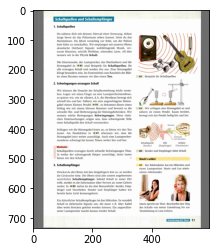

In [7]:
plt.imshow(poppler_to_rgb(renderer.render_page(pdf_document.create_page(2))))

In [8]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [9]:
models = [
    lambda: lp.AutoLayoutModel("lp://detectron2/PrimaLayout/mask_rcnn_R_50_FPN_3x"),
    lambda: lp.AutoLayoutModel("lp://detectron2/PubLayNet/faster_rcnn_R_50_FPN_3x"),
    lambda: lp.AutoLayoutModel("lp://detectron2/PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x"),
    lambda: lp.AutoLayoutModel("lp://efficientdet/PubLayNet/tf_efficientdet_d1"),
]

In [11]:
page_image = poppler_to_rgb(renderer.render_page(pdf_document.create_page(2)))

/home/rsebastian/.anaconda3/envs/phycor/lib/python3.8/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0
The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/home/rsebastian/.anaconda3/envs/phycor/lib/python3.8/site-packages/detectron2/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or f

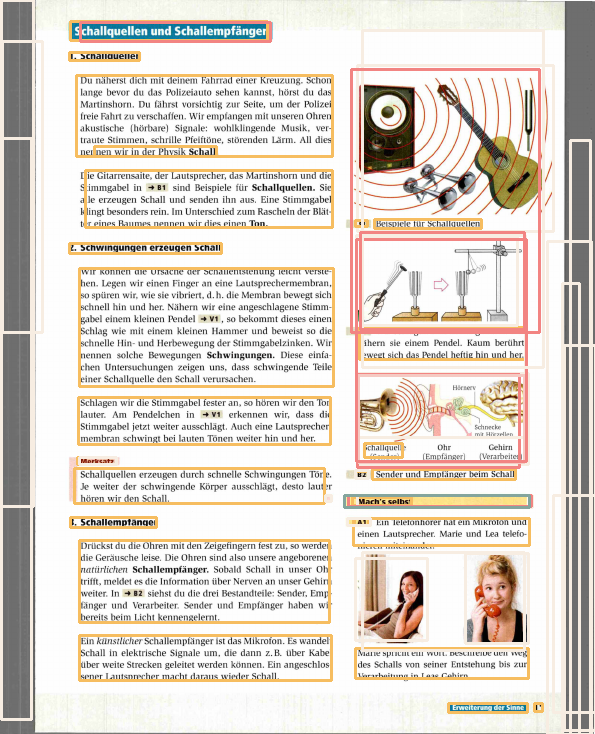

In [12]:
lp.draw_box(page_image, models[0]().detect(page_image), box_width=3)

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


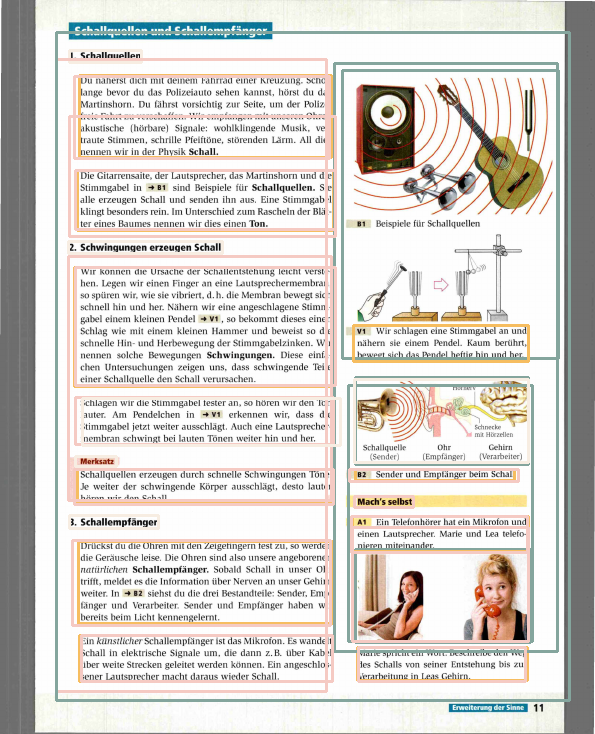

In [13]:
lp.draw_box(page_image, models[1]().detect(page_image), box_width=3)

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


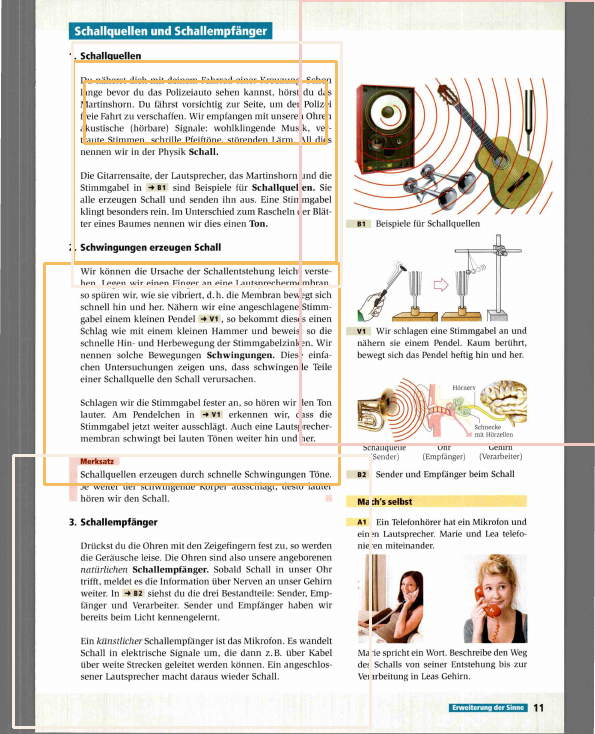

In [14]:
lp.draw_box(page_image, models[2]().detect(page_image), box_width=3)

/home/rsebastian/.anaconda3/envs/phycor/lib/python3.8/site-packages/effdet/bench.py:55: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  indices_all = cls_topk_indices_all // num_classes


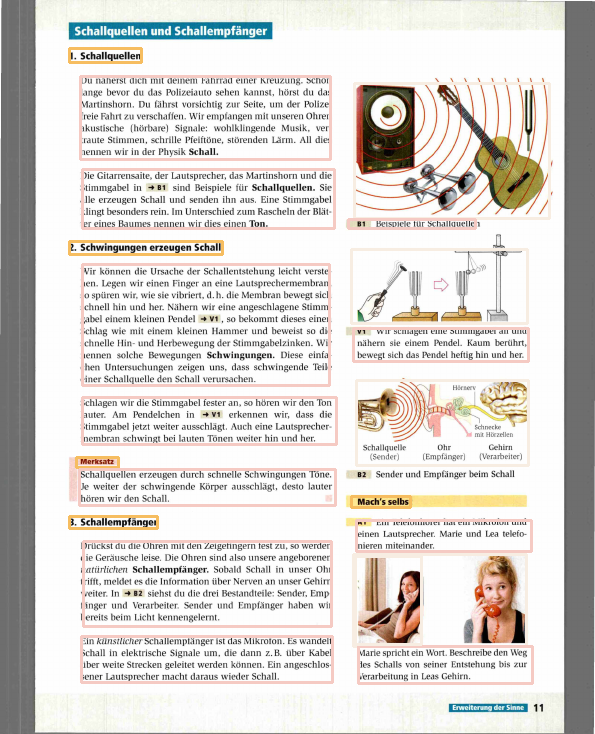

In [15]:
lp.draw_box(page_image, models[3]().detect(page_image), box_width=3)

In [16]:
too_much_model = models[1]

In [18]:
simple_model = models[3]